In [129]:
import pandas as pd
import seaborn as sb
import pandasql as pds
import matplotlib.pyplot as plt
import pyodbc as dbc

In [2]:
df=sb.load_dataset('diamonds')

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [26]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#Question 1:
maxprice=int(df['price'].max())

In [9]:
maxprice

18823

In [ ]:
# 18823 תשובה: מחיר היהלום הגבוהה ביותר   

In [10]:
#Question 2:
mean_price=int(df['price'].mean())

In [11]:
mean_price

3932

In [ ]:
#תשובה: המחיר הממוצע של יהלום 3932 

In [24]:
#Question 3, method 1:
count_ideal=df[df['cut']=='Ideal'].count()

In [25]:
count_ideal

carat      21551
cut        21551
color      21551
clarity    21551
depth      21551
table      21551
price      21551
x          21551
y          21551
z          21551
dtype: int64

In [18]:
#Question 3, method 2:
ideal=pds.sqldf("""select * from df where cut='Ideal';""",globals())

In [19]:
ideal

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
2,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
3,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
4,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
21546,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
21547,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
21548,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
21549,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [22]:
count_ideal2=ideal.count()

In [23]:
count_ideal2

carat      21551
cut        21551
color      21551
clarity    21551
depth      21551
table      21551
price      21551
x          21551
y          21551
z          21551
dtype: int64

In [ ]:
#Ideal תשובה: קיימים 21551 יהלומים מסוג 

In [38]:
#Question 4:
colorsdf=pds.sqldf("""select color from df group by color;""",globals())

In [39]:
colorsdf

,color
0,D
1,E
2,F
3,G
4,H
5,I
6,J


In [40]:
count_of_colors=colorsdf.count()

In [37]:
count_of_colors

color    7
dtype: int64

In [ ]:
#  D,E,F,G,H,I,J :תשובה:7 צבעים שונים יש ליהלומים

In [ ]:
#Question 5:

In [5]:
premium_carat_df=pds.sqldf("""select carat, cut from df where cut='Premium';""",globals())

In [6]:
premium_carat_df

,carat,cut
0,0.21,Premium
1,0.29,Premium
2,0.22,Premium
3,0.20,Premium
4,0.32,Premium
...,...,...
13786,0.79,Premium
13787,0.71,Premium
13788,0.71,Premium
13789,0.72,Premium


In [7]:
med=premium_carat_df['carat'].median()

In [8]:
med

np.float64(0.86)

In [ ]:
# תשובה: החציון קאראט של יהלומים מסוג פרימיום 0.86

In [ ]:
#Question 6:

In [15]:
df.pivot_table(index='cut',values='carat',aggfunc='mean')

C:\Users\Evgenia K\AppData\Local\Temp\ipykernel_5740\3581832330.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='cut',values='carat',aggfunc='mean')


,carat
cut,
Ideal,0.702837
Premium,0.891955
Very Good,0.806381
Good,0.849185
Fair,1.046137


In [ ]:
# אנחנו רואים בטבלה ממוצע 

In [ ]:
#Question 7:

In [16]:
df.pivot_table(index='color',values='price',aggfunc='mean')

C:\Users\Evgenia K\AppData\Local\Temp\ipykernel_5740\518624235.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='color',values='price',aggfunc='mean')


,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


In [ ]:
# אנחנו רואים בטבלה ממוצע מחיר לכל סוג צבע

In [ ]:
####### The second part of the project:

In [ ]:
#
Context:
A stroke is a medical condition in which poor blood flow to the brain causes cell death. 
There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. 
Both cause parts of the brain to stop functioning properly.
    
Attribute Information
1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 
5) Ever-married: "No" or "Yes"
6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed"
7) Residencetype: "Rural" or "Urban"
8) avg glucose level: average glucose level in blood
9) BMI: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
11) stroke: 1 if the patient had a stroke or 0 if not

In [49]:
df_bstroke=pd.read_csv('C:\\Users\\Evgenia K\\python\\Datasets\\project3\\brain_stroke.csv')

In [45]:
df_bstroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [46]:
df_bstroke.isna()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [47]:
df_bstroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# במסד הנתונים אין ערכי 0. זה אומר שאפשר לנתח מבלי למחוק שום דבר

In [ ]:
# רק אני רוצה לשנות נתונים בכמה עמודות. כי 0 ו 1 לא ברור מה זה אומר

In [51]:
df_bstroke['hypertension']=df_bstroke['hypertension'].replace({0:'No',1:'Yes'})

In [52]:
df_bstroke['heart_disease']=df_bstroke['heart_disease'].replace({0:'No',1:'Yes'})

In [53]:
df_bstroke['stroke']=df_bstroke['stroke'].replace({0:'No',1:'Had a stroke'})

In [54]:
df_bstroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Had a stroke
1,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Had a stroke
2,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Had a stroke
3,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Had a stroke
4,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Had a stroke
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,No,No,No,Private,Rural,70.15,29.8,formerly smoked,No
4977,Male,40.0,No,No,Yes,Private,Urban,191.15,31.1,smokes,No
4978,Female,45.0,Yes,No,Yes,Govt_job,Rural,95.02,31.8,smokes,No
4979,Male,40.0,No,No,Yes,Private,Rural,83.94,30.0,smokes,No


In [ ]:
#נמיין רק את אלו שעברו אירוע מוחי

In [64]:
df_bstroke_yes=pds.sqldf("""select * from df_bstroke where stroke='Had a stroke';""",globals())

In [65]:
df_bstroke_yes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Had a stroke
1,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Had a stroke
2,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Had a stroke
3,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Had a stroke
4,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Had a stroke
...,...,...,...,...,...,...,...,...,...,...,...
243,Male,79.0,No,No,Yes,Private,Rural,114.77,27.2,formerly smoked,Had a stroke
244,Male,74.0,No,No,Yes,Private,Urban,167.13,28.7,Unknown,Had a stroke
245,Female,76.0,Yes,Yes,Yes,Self-employed,Urban,199.86,31.7,smokes,Had a stroke
246,Male,74.0,No,No,Yes,Self-employed,Rural,60.98,28.1,never smoked,Had a stroke


In [66]:
df_bstroke_yes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             248 non-null    object 
 1   age                248 non-null    float64
 2   hypertension       248 non-null    object 
 3   heart_disease      248 non-null    object 
 4   ever_married       248 non-null    object 
 5   work_type          248 non-null    object 
 6   Residence_type     248 non-null    object 
 7   avg_glucose_level  248 non-null    float64
 8   bmi                248 non-null    float64
 9   smoking_status     248 non-null    object 
 10  stroke             248 non-null    object 
dtypes: float64(3), object(8)
memory usage: 21.4+ KB


In [67]:
df_bstroke_yes.describe()

,age,avg_glucose_level,bmi
count,248.000000,248.000000,248.000000
mean,67.819839,132.175565,30.186694
std,12.670565,61.771083,5.658245
min,1.320000,56.110000,16.900000
25%,59.000000,79.572500,26.975000
50%,71.000000,105.040000,29.450000
75%,78.000000,195.960000,32.650000
max,82.000000,271.740000,48.900000


In [68]:
df_bstroke_yes['age'].min()

np.float64(1.32)

In [ ]:
# .נראה לי שהערך המינימלי של 1.32 שנים הוא טעות, אז בדקתי בגוגל ומסתבר שגם ילדים יכולים לקבל שבץ מוחי
# במקרה זה, בוא נראה כמה ילדים מתחת לגיל 18 נמצאים במסד הנתונים שלנו  

In [71]:
df_childrens=pds.sqldf("""select age from df_bstroke_yes where age < '18';""",globals())

In [72]:
df_childrens

,age
0,14.00
1,1.32


In [73]:
df_childrens_count=df_childrens.count()

In [74]:
df_childrens_count

age    2
dtype: int64

In [ ]:
#2 :ילדים עד גיל18 שעברו אירוע מוחי  

In [75]:
df_bstroke_yes['age'].max()

np.float64(82.0)

In [ ]:
#גיל מקסימלי לדאטה בס: 82

In [ ]:
#Pivotעכשיו בואו נראה למי יש יותר מקרים של שבץ אצל נשים או גברים. לשם כך אנו משתמשים בטבלת 

In [79]:
df_bstroke_yes.pivot_table(index='gender',values='stroke',aggfunc='count')

,stroke
gender,
Female,140
Male,108


In [ ]:
#.אנחנו רואים שה יש לנו 140 נשים ו 108 גברים. כמות נשים יותר גבוה מגברים
#:אפשר לעשות פעולה הזאת בדרך אחרת ולבנות גרף עוגה המבוסס על זה

In [81]:
genderdf=df_bstroke_yes['gender'].value_counts()

In [82]:
genderdf

gender
Female    140
Male      108
Name: count, dtype: int64

In [83]:
genderdf1=genderdf.reset_index()

In [84]:
genderdf1

,gender,count
0,Female,140
1,Male,108


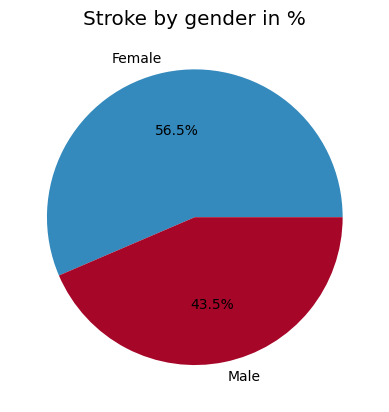

In [90]:
plt.style.use('bmh')
plt.pie(data=genderdf1,x='count',labels='gender',autopct='%1.1f%%')
plt.title("Stroke by gender in %")
plt.show()

In [ ]:
#בגרף הזה אנחנו רואים שנשים סובלות מאירוע מוחי ל13% יותר מגברים

In [ ]:
#.כעת ננתח כיצד מספר מקרי האירוע מוחי משתנה בהתאם לגיל. לשם כך, נבחן את מספר מקרי השבץ לכל גיל ונבנה גרפים

In [91]:
ages=df_bstroke_yes['age'].value_counts().sort_index()

In [92]:
ages

age
1.32      1
14.00     1
32.00     1
38.00     2
39.00     3
42.00     1
43.00     1
45.00     2
46.00     1
47.00     1
48.00     2
49.00     3
50.00     3
51.00     4
52.00     2
53.00     2
54.00     6
55.00     2
56.00     3
57.00    11
58.00     7
59.00     8
60.00     4
61.00     6
63.00     9
64.00     3
65.00     3
66.00     4
67.00     3
68.00     9
69.00     6
70.00     6
71.00     7
72.00     6
73.00     4
74.00     9
75.00     6
76.00    10
77.00     8
78.00    21
79.00    17
80.00    17
81.00    14
82.00     9
Name: count, dtype: int64

In [ ]:
#בטבלה רואים שבגיל 57, 76, 78, 79-81 יש יותר הרבה מקרים

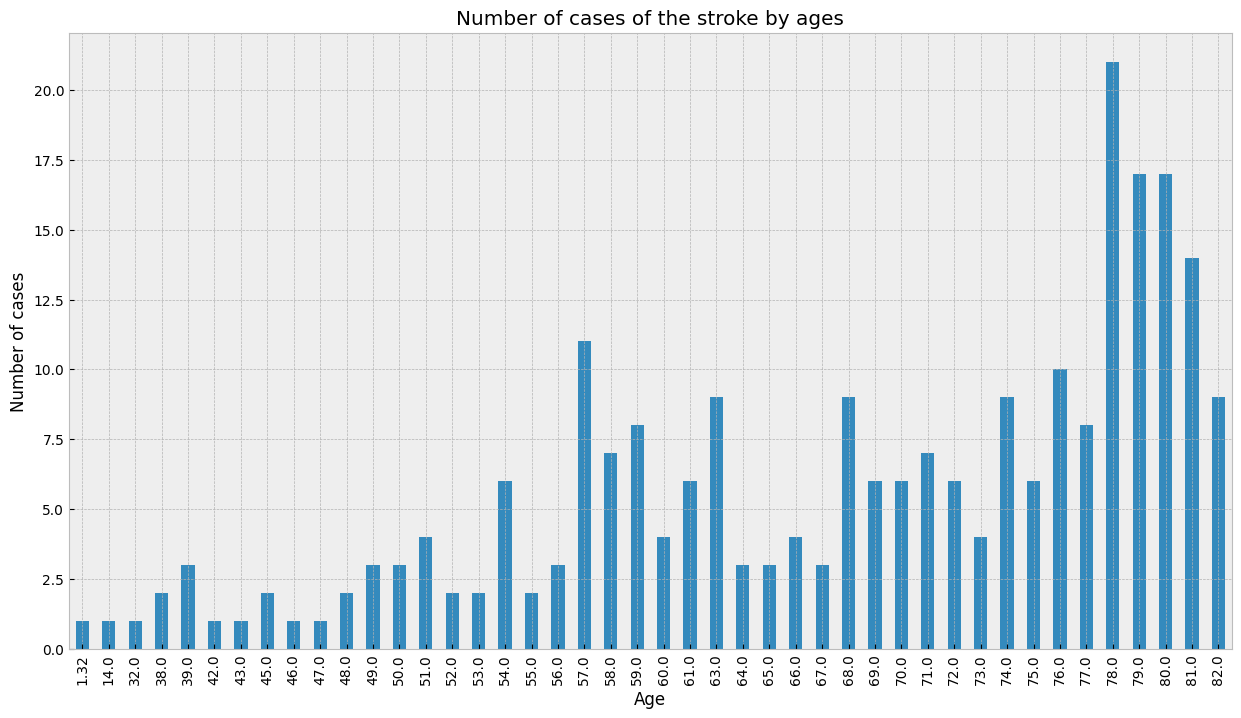

In [130]:
plt.figure(figsize=(15,8))
ages.plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Number of cases")
plt.title("Number of cases of the stroke by ages")
plt.show()

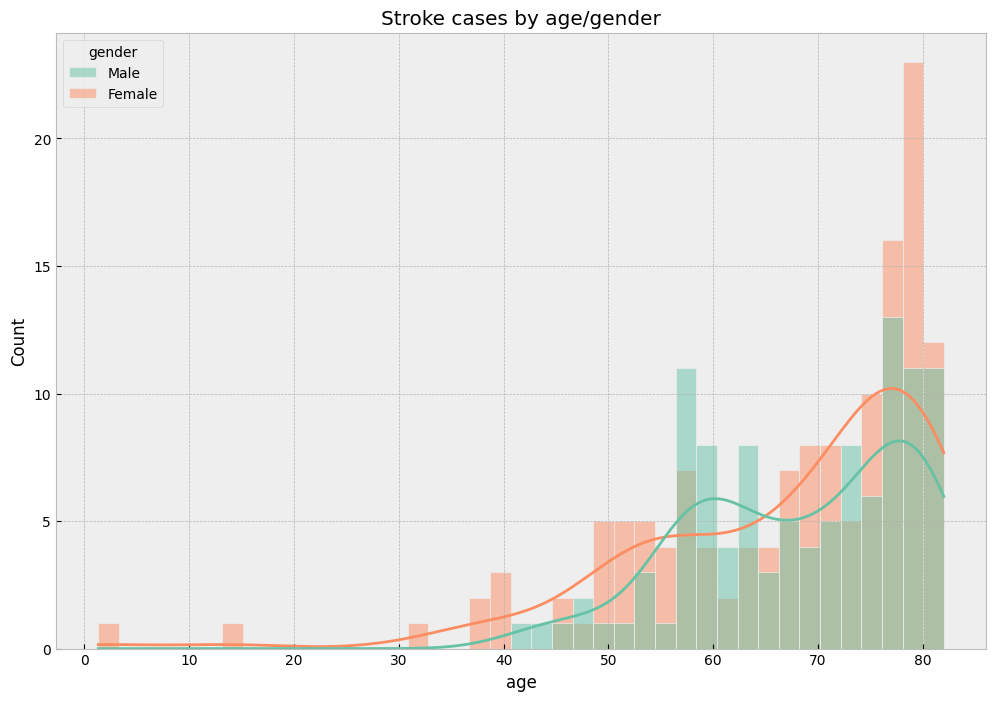

In [104]:
plt.figure(figsize=(12,8))
sb.histplot(data=df_bstroke_yes,x='age',bins=41,hue='gender',palette='Set2',kde=True)
plt.title("Stroke cases by age/gender")
plt.show()

In [ ]:
#.בגרפים אנחנו רואים שאחרי גיל 37 כמות מקרים מתחיל לגדול 
#.אנו רואים גם עליית מקרים בשכיחות בקרב גברים בני 57 שנים
#.בגיל 57-63 שנים, נתון זה ממשיך להיות גבוה למדי בקרב גברים
#העלייה במקרי שבץ אצל נשים מתחילה בגיל 68 והעלייה החדה במקרי שבץ אצל נשים מתחילה בגיל 78

In [ ]:
#בואו נראה כיצד אינדיקטורים שונים משפיעים על הסבירות לאירוע מוחי

In [131]:
hypertension_pvt=df_bstroke_yes.pivot_table(index='gender',values='stroke',columns='hypertension',aggfunc='count')

In [132]:
hypertension_pvt

hypertension,No,Yes
gender,,
Female,101,39
Male,81,27


In [133]:
heart_disease_pvt=df_bstroke_yes.pivot_table(index='gender',values='stroke',columns='heart_disease',aggfunc='count')

In [134]:
heart_disease_pvt

heart_disease,No,Yes
gender,,
Female,121,19
Male,80,28


In [135]:
ever_married_pvt=df_bstroke_yes.pivot_table(index='gender',values='stroke',columns='ever_married',aggfunc='count')

In [136]:
ever_married_pvt

ever_married,No,Yes
gender,,
Female,21,119
Male,8,100


In [137]:
work_type_pvt=df_bstroke_yes.pivot_table(index='gender',values='stroke',columns='work_type',aggfunc='count')

In [138]:
work_type_pvt

work_type,Govt_job,Private,Self-employed,children
gender,,,,
Female,23.0,75.0,40.0,2.0
Male,10.0,73.0,25.0,NaN


In [139]:
Residence_type_pvt=df_bstroke_yes.pivot_table(index='gender',values='stroke',columns='Residence_type',aggfunc='count')

In [140]:
Residence_type_pvt

Residence_type,Rural,Urban
gender,,
Female,63,77
Male,50,58


In [141]:
smoking_status_pvt=df_bstroke_yes.pivot_table(index='gender',values='stroke',columns='smoking_status',aggfunc='count')

In [142]:
smoking_status_pvt

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,25,34,62,19
Male,22,36,27,23


In [ ]:
#.על פי טבלאות אלו, אנו רואים כי נוכחות של יתר לחץ דם ומחלות לב בהיסטוריה הרפואית של החולה משפיעה פחות על הסיכון לאירוע מוחי מאשר העובדה שהמטופל היה נשוי
#.אנו רואים גם שעבודה בעסק פרטי ועצמאי מובילה לשכיחות גבוהה יותר של שבץ מוחי מאשר עבודה במפעל בבעלות ממשלתית (שכנראה נובעת מכמות הלחץ והסיכון שאדם חווה)
#. מגורים בעיר או מחוץ לעיר הם בערך אותו יחס - ממנו ניתן להסיק שהדבר אינו משפיע באופן משמעותי על הסיכון למחלה

In [ ]:
#עכשיו בואו ננתח כיצד רמות הגלוקוז משפיעות והאם הן משפיעות בכלל על הסבירות לאירוע מוחי. לשם כך נקבץ את הגלוקוז לפי גיל וניצור שני גרפי קו

In [120]:
glucose=df_bstroke_yes.groupby('age')['avg_glucose_level'].mean()

In [121]:
glucose

age
1.32      70.370000
14.00     57.930000
32.00     76.130000
38.00     91.865000
39.00     79.696667
42.00     83.410000
43.00    143.430000
45.00     78.930000
46.00     78.180000
47.00     86.940000
48.00     79.155000
49.00    112.333333
50.00    114.250000
51.00    117.275000
52.00    164.940000
53.00     63.360000
54.00    122.216667
55.00    151.690000
56.00    198.903333
57.00    141.912727
58.00    120.524286
59.00    127.056250
60.00    122.900000
61.00    138.781667
63.00    165.364444
64.00    125.896667
65.00    125.060000
66.00    111.405000
67.00    156.583333
68.00    181.542222
69.00    120.233333
70.00    154.665000
71.00    163.191429
72.00    155.191667
73.00    168.950000
74.00    118.475556
75.00    129.378333
76.00    140.652000
77.00    148.066250
78.00    124.643810
79.00    134.599412
80.00    115.965294
81.00    118.555000
82.00    144.477778
Name: avg_glucose_level, dtype: float64

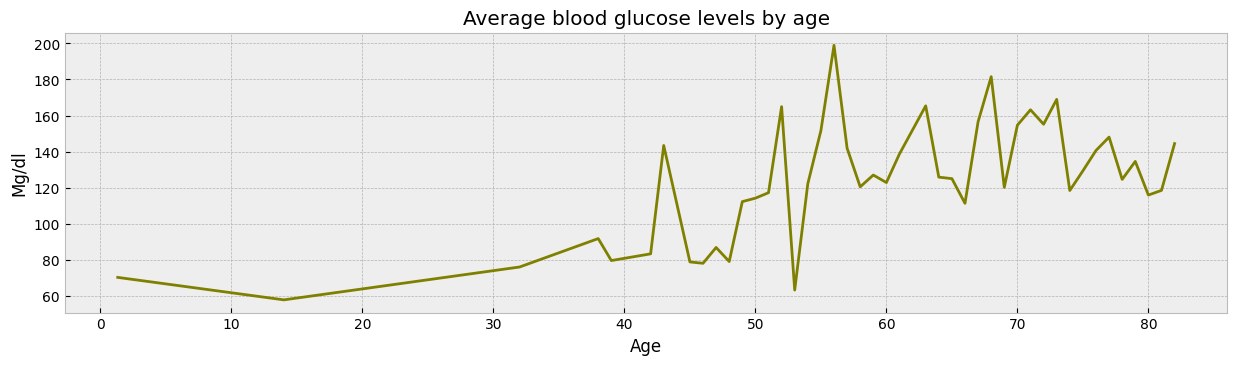

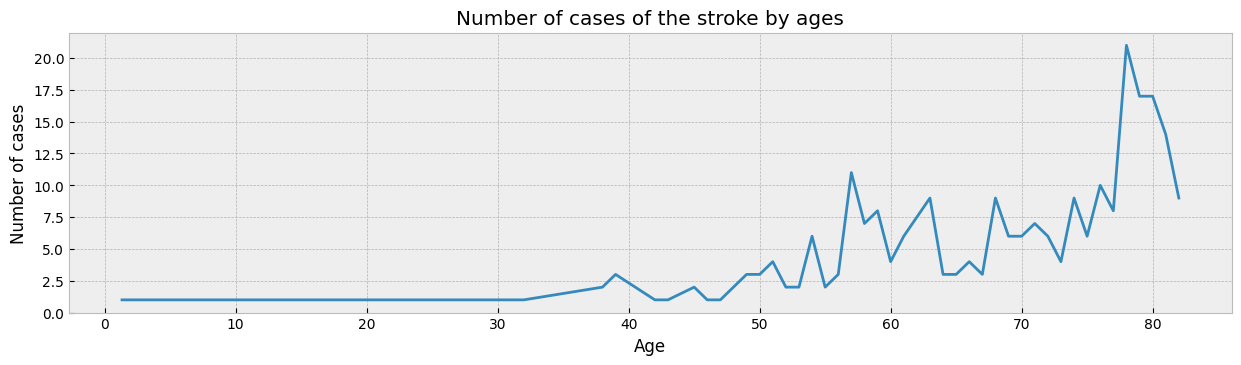

In [147]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
glucose.plot(kind='line',color='olive')
plt.xlabel("Age")
plt.ylabel("Mg/dl")
plt.title("Average blood glucose levels by age")
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
ages.plot(kind='line')
plt.xlabel("Age")
plt.ylabel("Number of cases")
plt.title("Number of cases of the stroke by ages")
plt.show()

In [ ]:
#.בגרפים אנו רואים שהעלייה במספר מקרי השבץ הולכת וגדלה בפרופורציה זהה לרמת הגלוקוז
#.מכאן ניתן להסיק שככל שרמת הגלוקוז בדם גבוהה יותר, כך הסיכון לשבץ מוחי גבוה יותר

In [ ]:
#.עכשיו בואו ננתח כיצד רמות מדד מסת הגוף משפיעות והאם הן משפיעות בכלל על הסבירות לאירוע מוחי.
#:לשם כך, אנו מחלקים את דטהפראים ל-2 חלקים
# אינדקס מסת הגוף תקין (לפי ויקיפדיה זה אינדקס פחות מ25) ואינדקס מסת הגוף מעל הנורמה (לפי ויקיפדיה זה אינדקס יותר מ25)

In [165]:
bmi_norm=pds.sqldf("""select gender, age, bmi from df_bstroke_yes where bmi<=25;""", globals())

In [166]:
bmi_norm

,gender,age,bmi
0,Female,79.00,24.0
1,Female,69.00,22.8
2,Female,78.00,24.2
3,Female,71.00,22.4
4,Male,80.00,23.5
5,Female,82.00,22.2
6,Female,72.00,23.1
7,Male,78.00,23.9
8,Male,60.00,20.2
9,Female,80.00,22.2


In [180]:
bmi_norm_count=bmi_norm.count()

In [181]:
bmi_norm_count

bmi_type    39
gender      39
age         39
bmi         39
dtype: int64

In [163]:
bmi_above_normal=pds.sqldf("""select gender, age, bmi from df_bstroke_yes where bmi>25;""", globals())

In [164]:
bmi_above_normal

,gender,age,bmi
0,Male,67.0,36.6
1,Male,80.0,32.5
2,Female,49.0,34.4
3,Male,81.0,29.0
4,Male,74.0,27.4
...,...,...,...
204,Male,79.0,27.2
205,Male,74.0,28.7
206,Female,76.0,31.7
207,Male,74.0,28.1


In [178]:
bmi_above_normal_count=bmi_above_normal.count()

In [179]:
bmi_above_normal_count

bmi_type    209
gender      209
age         209
bmi         209
dtype: int64

In [ ]:
#.מהטבלאות אנו רואים של-209 אנשים מתוך 248 מקרים יש מדד מסת גוף מוגבר. מכאן נוכל להסיק שמדד מסת הגוף משפיע על הסיכון למחלה